In [ ]:
!gdown 1DFbhTBpNV-FnaLsChe1kokA8ADqYKXTe #help_func
!gdown 1cKUED5iU2O87ZYFiOETJBFkyB9SnGucO #clusterizacao
!gdown 1NAWnQSMSB8SBK-hw7VCkAAOPQClz74YU #dados
!gdown 1zZQSFPbqL4c4x_NUZ0xOGd56TMGLJjod #matriz confusao

Downloading...
From (original): https://drive.google.com/uc?id=1DFbhTBpNV-FnaLsChe1kokA8ADqYKXTe
From (redirected): https://drive.google.com/uc?id=1DFbhTBpNV-FnaLsChe1kokA8ADqYKXTe&confirm=t&uuid=640e2b56-0e3a-490b-b1af-e6b5cf7dfef5
To: /content/helper_functions.py
100% 2.46k/2.46k [00:00<00:00, 8.03MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1cKUED5iU2O87ZYFiOETJBFkyB9SnGucO
From (redirected): https://drive.google.com/uc?id=1cKUED5iU2O87ZYFiOETJBFkyB9SnGucO&confirm=t&uuid=6114eb22-a686-4afa-8a16-eb32441cef9b
To: /content/clustering.py
100% 3.32k/3.32k [00:00<00:00, 10.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1NAWnQSMSB8SBK-hw7VCkAAOPQClz74YU
To: /content/wall-robot-navigation.csv
100% 75.2k/75.2k [00:00<00:00, 55.7MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1zZQSFPbqL4c4x_NUZ0xOGd56TMGLJjod
From (redirected): https://drive.google.com/uc?id=1zZQSFPbqL4c4x_NUZ0xOGd56TMGLJjod&confirm=t&uuid=2778d8cb-458c-4952-ad48-32c6e9

In [ ]:
from clustering import KNN
import torch
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from helper_functions import plot_decision_boundary
from Matriz_confucao import MetricasClassificacao
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

df = pd.read_csv('/content/wall-robot-navigation.csv',sep = ";")
nt = len(df)
X_train, X_test, y_train, y_test = train_test_split(df[["X1","X2"]], df["Y"].values, test_size=0.2, random_state=42)
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train)
# Convert data to pytorch tensor
X_train = torch.from_numpy(X_train)
X_test = torch.from_numpy(X_test)
y_train = torch.from_numpy(y_train)
y_test = torch.from_numpy(y_test)

[[ 0.40853368 -0.65636405]
 [ 0.06012125 -0.05576272]
 [ 0.81852597 -0.7467458 ]
 ...
 [ 3.18935099  0.31451092]
 [-0.75500177  0.43113253]
 [-0.84251001  0.42530145]]


In [ ]:
knn = KNN(X_train, y_train,k = 3)
preds = knn(X_test)




cnf_matrix = metrics.confusion_matrix (y_test, preds)
cnf_matrix

array([[448,   2,   1,   3],
       [  3, 424,   0,   0],
       [  1,   0,  59,   0],
       [  2,   1,   0, 148]])

In [ ]:

classificar = MetricasClassificacao(cnf_matrix,len(X_test))
micro_knn_houdout,macro_knn_houdout = classificar.operacional()

micro = pd.DataFrame(list(micro_knn_houdout.values()), index=list(micro_knn_houdout.keys()), columns=['KNN_houdout_micro'])
macro = pd.DataFrame(list(macro_knn_houdout.values()), index=list(macro_knn_houdout.keys()), columns=['KNN_houdout_macro'])

knn_df = pd.merge(micro,macro,left_index = True,right_index  =True)
knn_df

Matriz de confução contem todos as nt possibilidades
0 1

[[448   2]
 [  3 424]]
0 2

[[448   1]
 [  1  59]]
0 3

[[448   3]
 [  2 148]]
1 2

[[424   0]
 [  0  59]]
1 3

[[424   0]
 [  1 148]]
2 3

[[ 59   0]
 [  0 148]]


,KNN_houdout_micro,KNN_houdout_macro
ACC,0.996000,0.996717
MCC,0.990572,0.990502
SEN,0.997342,0.997779
ESP,0.992951,0.992710
P,0.996900,0.997387
BA,0.995146,0.995245
F1,0.997121,0.997583


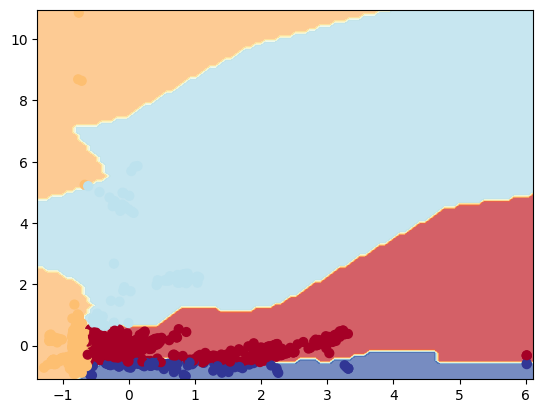

In [ ]:

X = X_test
model = knn
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101),
                      np.linspace(y_min, y_max, 101))

# Make features
X_to_pred_on = torch.from_numpy(
    np.column_stack((xx.ravel(), yy.ravel()))).float()

# Make predictions
#model.eval()
y_pred = model(X_to_pred_on)
y_pred = y_pred.reshape(xx.shape).detach().numpy()
plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
plt.scatter(X[:, 0], X[:, 1], c=y_test, s=40, cmap=plt.cm.RdYlBu)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.savefig('knn_houdout.png', dpi=300)


In [ ]:
def plot_matrix_indicadora_knn(X,y_train,nome,scater = False):
    # X = X_test
    # model = knn
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101),
                          np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(
        np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    #model.eval()
    y_pred = knn(X_to_pred_on)
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    if scater == True:
      plt.scatter(X[:, 0], X[:, 1], c=y_train, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.savefig(f'{nome}.png', dpi=300)
    plt.show()
def plot_matrix_indicadora_regressao(X,y_train,nome,scater = False):
    # X = X_test
    # model = knn
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101),
                          np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(
        np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    #model.eval()
    y_pred = log_regression. predict (X_to_pred_on)
    y_pred = y_pred.reshape(xx.shape)
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    if scater == True:
      plt.scatter(X[:, 0], X[:, 1], c=y_train, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.savefig(f'{nome}.png', dpi=300)
    plt.show()


In [ ]:
# plot_matrix_indicadora_knn(X_test,y_testscater = True)


In [ ]:
# Modelo de regrecao:
from sklearn. model_selection import train_test_split
from sklearn. linear_model import LogisticRegression
from sklearn import metrics
 #instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression. fit (X_train,y_train)

#use model to make predictions on test data
y_pred = log_regression. predict (X_test)



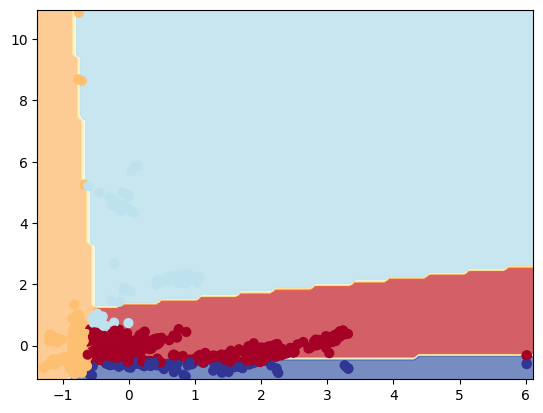

In [ ]:
plot_matrix_indicadora_regressao(X_test,y_test,"reg_log_houdtou",scater = True)

In [ ]:
cnf_matrix = metrics.confusion_matrix (y_test, y_pred)
cnf_matrix

classificar = MetricasClassificacao(cnf_matrix,len(X_test))
micro_regrssao_houdout,macro_regrssao_houdout = classificar.operacional()

micro = pd.DataFrame(list(micro_regrssao_houdout.values()), index=list(micro_regrssao_houdout.keys()), columns=['logit_houdout_micro'])
macro = pd.DataFrame(list(macro_regrssao_houdout.values()), index=list(macro_regrssao_houdout.keys()), columns=['logit_houdout_macro'])

regressao_df = pd.merge(micro,macro,left_index = True,right_index  =True)
regressao_df

Matriz de confução contem todos as nt possibilidades
0 1

[[407  31]
 [  0 423]]
0 2

[[407   0]
 [  8  49]]
0 3

[[407  16]
 [  8 142]]
1 2

[[423   2]
 [  3  49]]
1 3

[[423   2]
 [  1 142]]
2 3

[[ 49   0]
 [  0 142]]


,logit_houdout_micro,logit_houdout_macro
ACC,0.977345,0.981518
MCC,0.947624,0.945725
SEN,0.976465,0.980331
ESP,0.979317,0.956938
P,0.990637,0.992008
BA,0.977891,0.968635
F1,0.983500,0.985922


In [ ]:
# Perceba que acima foi realizado o aprouch do houdout com 20% dos dados utilizados para o teste.
# Vamos aplicar agora o conceito de leave-one-out-cross-validation
from sklearn.model_selection import LeaveOneOut
df = pd.read_csv('/content/wall-robot-navigation.csv',sep = ";")

loo = LeaveOneOut()
loo.get_n_splits(df[["X1","X2"]].values)

results = []

#criar os arrays:

previsoes_reg = []
for i, (train_index, test_index) in enumerate(loo.split(df[["X1","X2"]].values)):
    #  print(f"Fold {i}:")
    #  print(f"  Train: index={train_index}")
    #  print(f"  Test:  index={test_index}")
     X_train = torch.tensor(df.loc[train_index, ["X1", "X2"]].values)
     y_train = torch.tensor(df.loc[train_index, ["Y"]].values).squeeze()

     X_test = torch.tensor(df.loc[test_index, ["X1", "X2"]].values)
     y_test = torch.tensor(df.loc[test_index, ["Y"]].values)

    #  knn = KNN(X_train, y_train,k = 3)
    #  print(X_test)
    #  preds = knn(X_test)

     log_regression = LogisticRegression()

    #fit the model using the training data
     log_regression. fit (X_train,y_train)

    #use model to make predictions on test data
     y_pred_reg = log_regression. predict (X_test)

     previsoes_reg.append(y_pred_reg)


    #  break




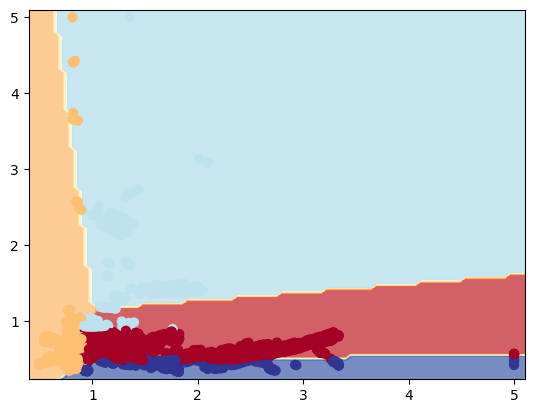

In [ ]:
plot_matrix_indicadora_regressao(X_train,y_train,"regressao_LOOCV",scater = True)

In [ ]:
cnf_matrix = metrics.confusion_matrix (df["Y"].values, previsoes_reg)
cnf_matrix

classificar = MetricasClassificacao(cnf_matrix,len(df))
micro_regrssao_LOOC,micro_regrssao_LOOC = classificar.operacional()

micro = pd.DataFrame(list(micro_regrssao_LOOC.values()), index=list(micro_regrssao_LOOC.keys()), columns=['logit_LOOCV_micro'])
macro = pd.DataFrame(list(micro_regrssao_LOOC.values()), index=list(micro_regrssao_LOOC.keys()), columns=['logit_LOOCV_macro'])

TEMP = pd.merge(micro,macro,left_index = True,right_index  =True)
regressao_df = pd.merge(regressao_df,TEMP,left_index = True,right_index = True)

regressao_df

Matriz de confução contem todos as nt possibilidades
0 1

[[1997  182]
 [   0 2080]]
0 2

[[1997    0]
 [  40  267]]
0 3

[[1997   26]
 [  99  720]]
1 2

[[2080   15]
 [  21  267]]
1 3

[[2080    2]
 [   7  720]]
2 3

[[267   0]
 [  0 720]]


,logit_houdout_micro,logit_houdout_macro,logit_LOOCV_micro,logit_LOOCV_macro
ACC,0.977345,0.981518,0.979602,0.979602
MCC,0.947624,0.945725,0.942179,0.942179
SEN,0.976465,0.980331,0.982584,0.982584
ESP,0.979317,0.956938,0.944380,0.944380
P,0.990637,0.992008,0.986630,0.986630
BA,0.977891,0.968635,0.963482,0.963482
F1,0.983500,0.985922,0.984236,0.984236


In [ ]:
cnf_matrix

array([[1997,  182,    0,   26],
       [   0, 2080,   15,    2],
       [  40,   21,  267,    0],
       [  99,    7,    0,  720]])

In [ ]:
previsoes_knn = []
for i, (train_index, test_index) in enumerate(loo.split(df[["X1","X2"]].values)):
    #  print(f"Fold {i}:")
    #  print(f"  Train: index={train_index}")
    #  print(f"  Test:  index={test_index}")
     X_train = torch.tensor(df.loc[train_index, ["X1", "X2"]].values)
     y_train = torch.tensor(df.loc[train_index, ["Y"]].values).squeeze()

     X_test = torch.tensor(df.loc[test_index, ["X1", "X2"]].values)
     y_test = torch.tensor(df.loc[test_index, ["Y"]].values)



     knn = KNN(X_train, y_train,k = 3)
    #  print(X_test)
     preds = knn(X_test)
     previsoes_knn.append(preds)
    #  break

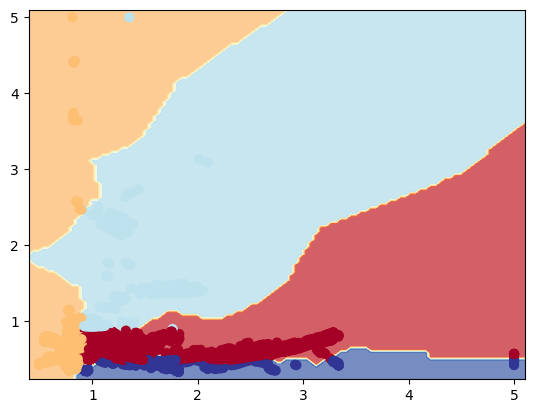

In [ ]:
plot_matrix_indicadora_knn(X_train,y_train,"KNN_LOOCV",scater = True)

In [ ]:
cnf_matrix_knn = metrics.confusion_matrix (df["Y"].values, previsoes_knn)
cnf_matrix_knn

classificar = MetricasClassificacao(cnf_matrix,len(df))
micro_knn_LOOC,micro_KNN_LOOC = classificar.operacional()

micro = pd.DataFrame(list(micro_knn_LOOC.values()), index=list(micro_knn_LOOC.keys()), columns=['KNN_LOOCV_micro'])
macro = pd.DataFrame(list(micro_regrssao_LOOC.values()), index=list(micro_regrssao_LOOC.keys()), columns=['KNN_LOOCV_macro'])

TEMP = pd.merge(micro,macro,left_index = True,right_index  =True)
knn_df = pd.merge(knn_df,TEMP,left_index = True,right_index = True)

knn_df


Matriz de confução contem todos as nt possibilidades
0 1

[[1997  182]
 [   0 2080]]
0 2

[[1997    0]
 [  40  267]]
0 3

[[1997   26]
 [  99  720]]
1 2

[[2080   15]
 [  21  267]]
1 3

[[2080    2]
 [   7  720]]
2 3

[[267   0]
 [  0 720]]


,KNN_houdout_micro,KNN_houdout_macro,KNN_LOOCV_micro,KNN_LOOCV_macro
ACC,0.996000,0.996717,0.974846,0.979602
MCC,0.990572,0.990502,0.942133,0.942179
SEN,0.997342,0.997779,0.978859,0.982584
ESP,0.992951,0.992710,0.966201,0.944380
P,0.996900,0.997387,0.984223,0.986630
BA,0.995146,0.995245,0.972530,0.963482
F1,0.997121,0.997583,0.981534,0.984236


In [ ]:
y_train

tensor([4, 4, 4,  ..., 2, 2, 1])

In [ ]:

micro_knn_houdout

# for chave, valor in micro_knn_houdout.items():
#     if not isinstance(valor, (list, tuple)):
#         micro_knn_houdout[chave] = [valor]

indices = list(micro_knn_houdout.keys())
valores = list(micro_knn_houdout.values())

# Criar DataFrame com índices
knn_houdout = pd.DataFrame([valores], index=indices)
micro = pd.DataFrame(list(micro_knn_houdout.values()), index=list(micro_knn_houdout.keys()), columns=['KNN_houdout_micro'])
macro = pd.DataFrame(list(micro_knn_houdout.values()), index=list(micro_knn_houdout.keys()), columns=['KNN_houdout_micro'])
macro

,KNN_houdout_micro
ACC,0.996000
MCC,0.990572
SEN,0.997342
ESP,0.992951
P,0.996900
BA,0.995146
F1,0.997121


In [ ]:
df

,X1,X2,Y
0,1.687,0.445,4
1,1.687,0.449,4
2,1.687,0.449,4
3,1.687,0.449,4
4,1.687,0.449,4
...,...,...,...
5451,1.024,0.657,1
5452,0.894,0.649,2
5453,0.873,0.642,2
5454,0.967,0.635,1


In [ ]:
micro_regrssao_houdout,micro_regrssao_houdout


({'ACC': 0.9773452456924059,
  'MCC': 0.9476237442618836,
  'SEN': 0.976465159206276,
  'ESP': 0.9793174767321613,
  'P': 0.9906367041198502,
  'BA': 0.9778913179692186,
  'F1': 0.9834998838019986},
 {'ACC': 0.9773452456924059,
  'MCC': 0.9476237442618836,
  'SEN': 0.976465159206276,
  'ESP': 0.9793174767321613,
  'P': 0.9906367041198502,
  'BA': 0.9778913179692186,
  'F1': 0.9834998838019986})

In [ ]:
micro_regrssao_LOOC,micro_regrssao_LOOC


({'ACC': 0.9796019578870325,
  'MCC': 0.9421790077676232,
  'SEN': 0.9825837880702459,
  'ESP': 0.9443804070193448,
  'P': 0.9866301862922481,
  'BA': 0.9634820975447953,
  'F1': 0.9842360576285462},
 {'ACC': 0.9796019578870325,
  'MCC': 0.9421790077676232,
  'SEN': 0.9825837880702459,
  'ESP': 0.9443804070193448,
  'P': 0.9866301862922481,
  'BA': 0.9634820975447953,
  'F1': 0.9842360576285462})

In [ ]:

micro_knn_LOOC,micro_KNN_LOOC

({'ACC': 0.9748459958932238,
  'MCC': 0.9421327014002152,
  'SEN': 0.978859344169877,
  'ESP': 0.9662011738514471,
  'P': 0.9842229570146434,
  'BA': 0.972530259010662,
  'F1': 0.9815338232523082},
 {'ACC': 0.9796019578870325,
  'MCC': 0.9421790077676232,
  'SEN': 0.9825837880702459,
  'ESP': 0.9443804070193448,
  'P': 0.9866301862922481,
  'BA': 0.9634820975447953,
  'F1': 0.9842360576285462})

In [ ]:
knn_df

,KNN_houdout_micro,KNN_houdout_macro,KNN_LOOCV_micro,KNN_LOOCV_macro
ACC,0.996000,0.996717,0.974846,0.979602
MCC,0.990572,0.990502,0.942133,0.942179
SEN,0.997342,0.997779,0.978859,0.982584
ESP,0.992951,0.992710,0.966201,0.944380
P,0.996900,0.997387,0.984223,0.986630
BA,0.995146,0.995245,0.972530,0.963482
F1,0.997121,0.997583,0.981534,0.984236


from matplotlib import pyplot as plt
knn_df['KNN_houdout_micro'].plot(kind='hist', bins=20, title='KNN_houdout_micro')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
knn_df['KNN_houdout_macro'].plot(kind='hist', bins=20, title='KNN_houdout_macro')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
knn_df['KNN_LOOCV_micro'].plot(kind='hist', bins=20, title='KNN_LOOCV_micro')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
knn_df['KNN_LOOCV_macro'].plot(kind='hist', bins=20, title='KNN_LOOCV_macro')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
knn_df.plot(kind='scatter', x='KNN_houdout_micro', y='KNN_houdout_macro', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
knn_df.plot(kind='scatter', x='KNN_houdout_macro', y='KNN_LOOCV_micro', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
knn_df.plot(kind='scatter', x='KNN_LOOCV_micro', y='KNN_LOOCV_macro', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
knn_df['KNN_houdout_micro'].plot(kind='line', figsize=(8, 4), title='KNN_houdout_micro')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
knn_df['KNN_houdout_macro'].plot(kind='line', figsize=(8, 4), title='KNN_houdout_macro')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
knn_df['KNN_LOOCV_micro'].plot(kind='line', figsize=(8, 4), title='KNN_LOOCV_micro')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
knn_df['KNN_LOOCV_macro'].plot(kind='line', figsize=(8, 4), title='KNN_LOOCV_macro')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
regressao_df

,logit_houdout_micro,logit_houdout_macro,logit_LOOCV_micro,logit_LOOCV_macro
ACC,0.977345,0.981518,0.979602,0.979602
MCC,0.947624,0.945725,0.942179,0.942179
SEN,0.976465,0.980331,0.982584,0.982584
ESP,0.979317,0.956938,0.944380,0.944380
P,0.990637,0.992008,0.986630,0.986630
BA,0.977891,0.968635,0.963482,0.963482
F1,0.983500,0.985922,0.984236,0.984236
